## Preparação

In [ ]:
install.packages('gvlma') 

library(ggplot2)   # exploração gráfica
library(dplyr)     # exploração estatística e ETL
library(gvlma)     # Para o modelo de regressão linear 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
autos <- read.csv("/content/autos.csv", sep= ';')

autos$wheel.base = as.numeric(sub(",", ".", autos$wheel.base))
autos$length = as.numeric(sub(",", ".", autos$length))
autos$width = as.numeric(sub(",", ".", autos$width))
autos$height = as.numeric(sub(",", ".", autos$height))
autos$curb.weight = as.numeric(sub(",", ".", autos$curb.weight))
autos$engine.type = as.numeric(sub(",", ".", autos$engine.type))
autos$num.cylinders = as.numeric(sub(",", ".", autos$num.cylinders))
autos$engine.size = as.numeric(sub(",", ".", autos$engine.size))
autos$bore = as.numeric(sub(",", ".", autos$bore))
autos$stroke = as.numeric(sub(",", ".", autos$stroke))
head(autos)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,make,fuel.type,aspiration,num.doors,body.style,drive.wheels,engine.location,wheel.base,length,width,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>
1,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,⋯,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,⋯,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,⋯,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
5,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,⋯,136,mpfi,3.19,3.40,8,115,5500,18,22,17450
6,audi,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,⋯,136,mpfi,3.19,3.40,"8,5",110,5500,19,25,15250


Carregando, ajustando e visualizando os dados

In [ ]:
str(autos)

'data.frame':	193 obs. of  24 variables:
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.doors        : int  2 2 2 4 4 2 4 4 4 2 ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : num  2548 2548 2823 2337 2824 ...
 $ engine.type      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ num.cylinders    : num  4 4 6 4 5 5 5 5 5 4 ...
 $ engine.size      : num  130 130 152 109 136 136 136 136 131 108 ...
 $ fuel.syste

Visualizamos com str() as variáveis presentes no dataset, o tipo de variável e exemplos dos registros presentes

In [ ]:
summary(autos)

     make            fuel.type          aspiration          num.doors    
 Length:193         Length:193         Length:193         Min.   :2.000  
 Class :character   Class :character   Class :character   1st Qu.:2.000  
 Mode  :character   Mode  :character   Mode  :character   Median :4.000  
                                                          Mean   :3.161  
                                                          3rd Qu.:4.000  
                                                          Max.   :4.000  
                                                                         
  body.style        drive.wheels       engine.location      wheel.base    
 Length:193         Length:193         Length:193         Min.   : 86.60  
 Class :character   Class :character   Class :character   1st Qu.: 94.50  
 Mode  :character   Mode  :character   Mode  :character   Median : 97.00  
                                                          Mean   : 98.92  
                                 

## Regressão Multivariada

### a)    Ajustar um modelo de regressão linear sendo price a variável alvo (resposta), como função das demais variáveis citadas acima: horsepower, length, engine.size, city.mpg.

In [ ]:
multi <- lm(formula = price ~ horsepower + length + engine.size + city.mpg, data = autos)
resumo <- summary(multi)
resumo


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg, 
    data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9697.0 -1745.7    24.9  1389.4 12904.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28480.00    7114.51  -4.003 8.99e-05 ***
horsepower      52.74      16.62   3.174 0.001756 ** 
length         114.58      32.30   3.548 0.000491 ***
engine.size    115.32      12.92   8.922 4.06e-16 ***
city.mpg        61.51      83.05   0.741 0.459849    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3499 on 188 degrees of freedom
Multiple R-squared:  0.8168,	Adjusted R-squared:  0.8129 
F-statistic: 209.5 on 4 and 188 DF,  p-value: < 2.2e-16


O modelo de regressão linear multivariada foi criado com a variável resposta "Price" e co 4 variáveis explicativas selecionadas (horsepower + length + engine.size + city.mpg). Neste modelo percebemos que das 4 variáveis presentes no modelo apenas a "city.mpg" não apresenta significância estatística, o R² indica que o modelo é capaz de explicar 81,29% da variação dos dados.

### b)    Realizar a análise do modelo ajustado, avaliando o valor do R-quadrado, a significância estatística de cada parâmetro ajustado e a qualidade total do ajuste pela estatística F.

In [ ]:
resumo$r.squared

[1] 0.8167501

In [ ]:
resumo$adj.r.squared

[1] 0.8128512

In [ ]:
resumo$fstatistic

value    numdf    dendf 
209.4804   4.0000 188.0000

In [ ]:
sum(multi$residuals)

[1] 3.823608e-12

In [ ]:
mean(multi$residuals)

[1] 1.895087e-14

https://quantifyinghealth.com/f-statistic-in-linear-regression/

### c)    Realizar a verificação de aderência do modelo às premissas estatísticas do método dos mínimos quadrados através dos gráficos diagnósticos, comentando o gráfico dos resíduos x valores ajustados e o gráfico da curva Normal-QQ.

#### Normalidade

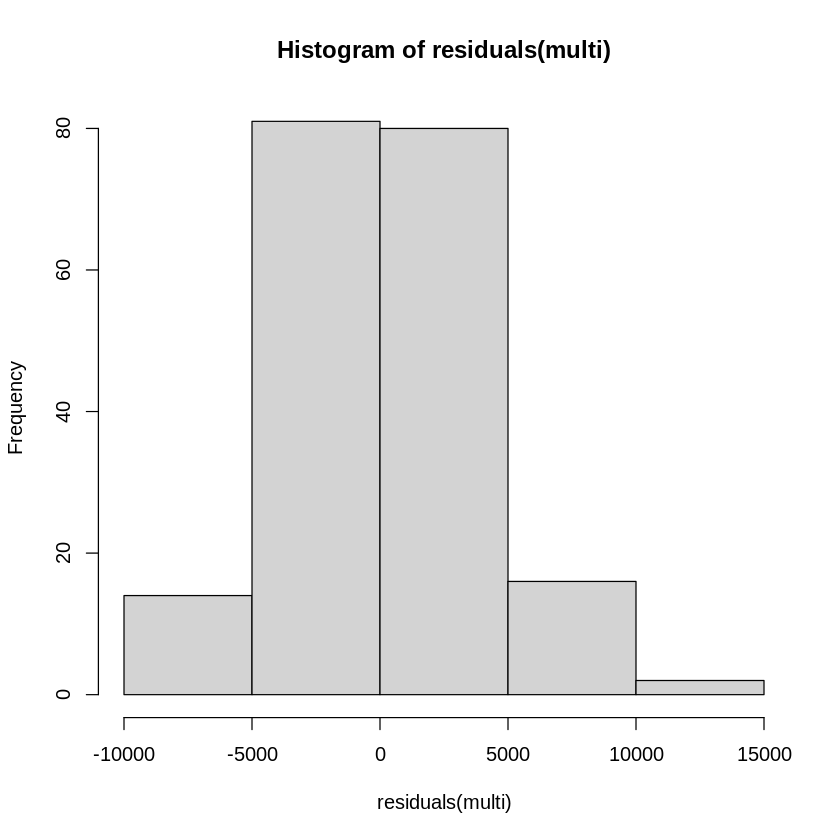

In [ ]:
hist(residuals(multi),breaks=5)

In [ ]:
shapiro.test(multi$residuals)


	Shapiro-Wilk normality test

data:  multi$residuals
W = 0.96546, p-value = 0.0001102


Apesar de graficamente, com o histograma com 5 breaks, parecer que os dados estão normalmente distribuídos o teste de shappiro com maior precisão nos indica que com o p-value de 0,00011 < 0,05 que os dados não são normais. 

#### Heterocedasticidade e Homocedasticidade

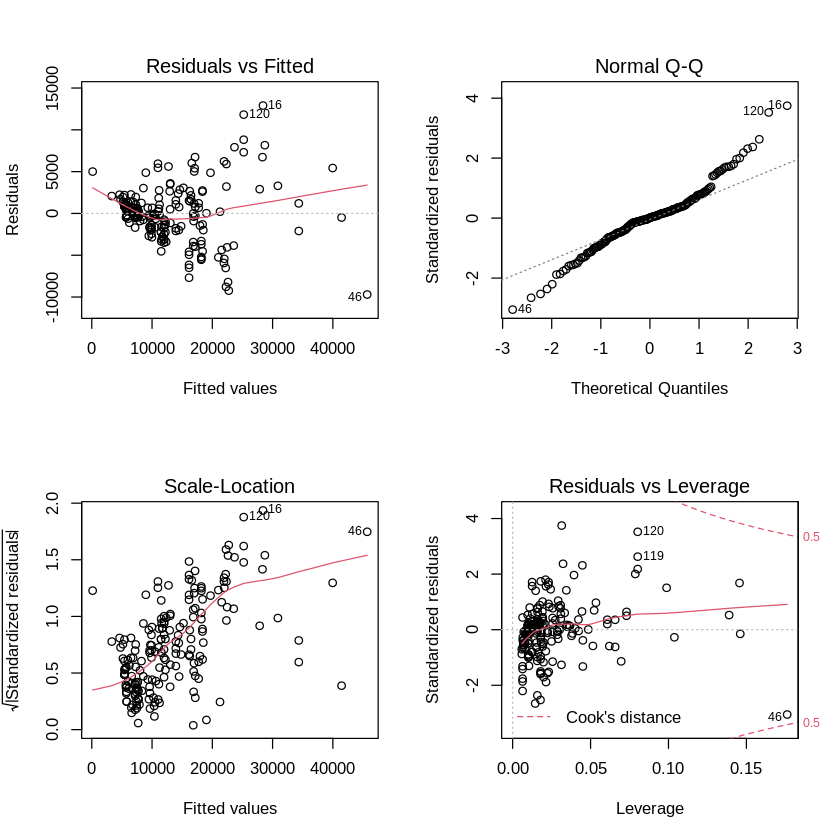

In [ ]:
par(mfrow=c(2,2))
plot(multi)

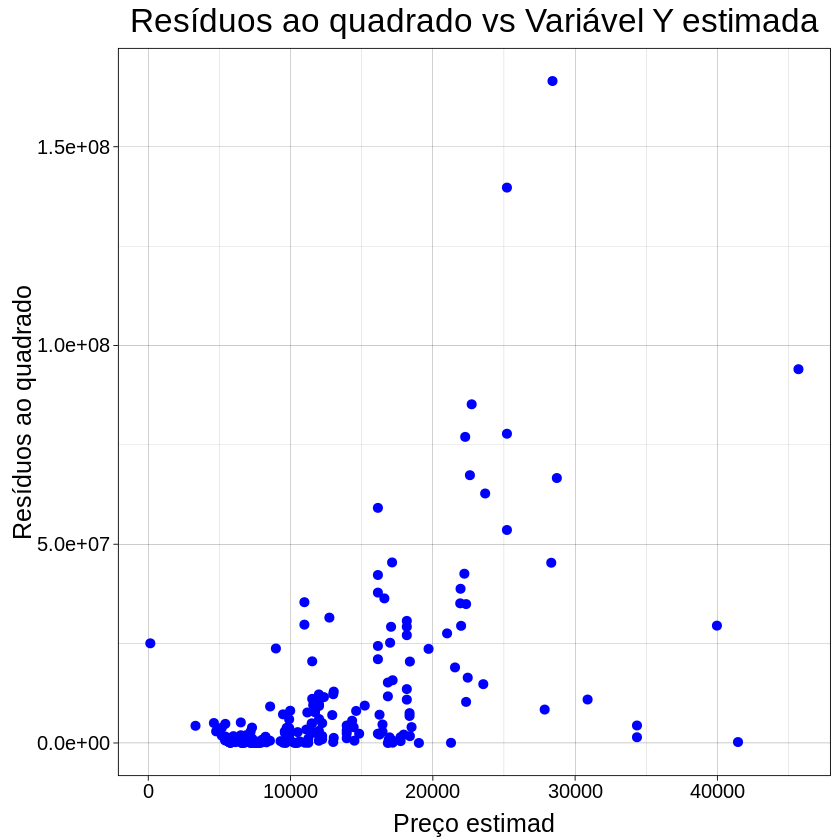

In [ ]:
ggplot(data = autos, aes(x = multi$fitted.values, y = multi$residuals ** 2)) + 
    geom_point(size = 1.5, stroke = 1, color = 'blue') + 
    xlab("Preço estimad") + 
    ylab("Resíduos ao quadrado") + 
    theme_linedraw()+
    ggtitle('Resíduos ao quadrado vs Variável Y estimada') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

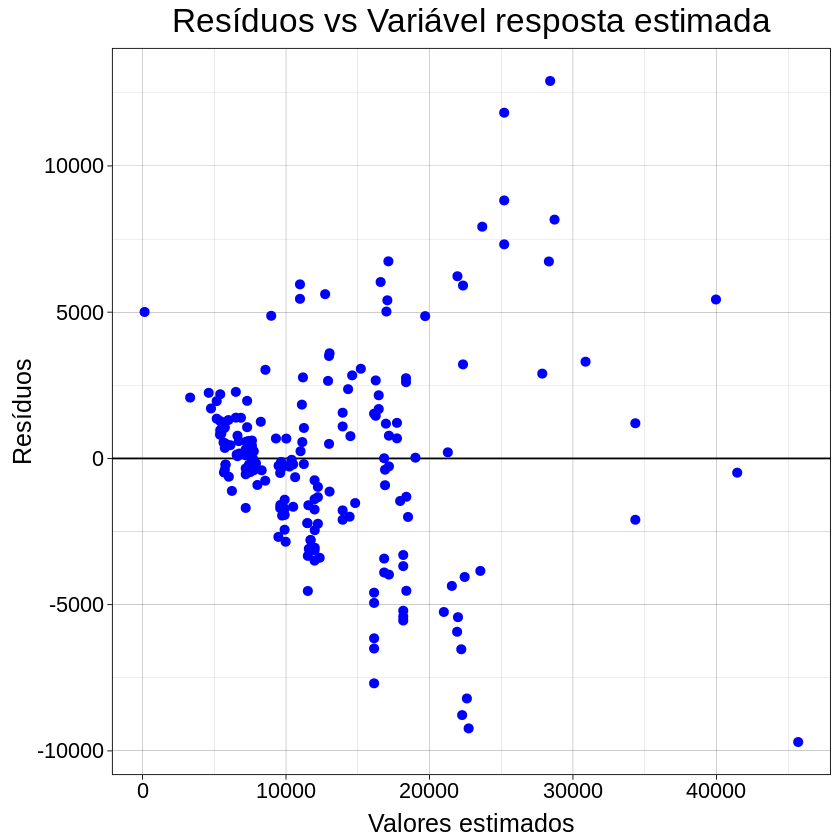

In [ ]:
ggplot(data = autos, aes(x = multi$fitted.values, y = multi$residuals)) + 
    geom_hline(yintercept = 0, color = 'black') +
    geom_point(size = 1.5, stroke = 1, color='blue') + 
    xlab("Valores estimados") + 
    ylab("Resíduos") + 
    theme_linedraw() +
    ggtitle('Resíduos vs Variável resposta estimada') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 13),
        axis.text.x=element_text(size = 13),
    )

Neste gráfico dos resíduos VS valores estimados percebemos que não há uma relação entre as duas variáveis, e os poontos esparços indicam que os resíduos são heterocedásticos, atendendo ao critério dos mínimos quadrados

#### Linearidade

In [ ]:
df <- select(autos , price, length , engine.size , city.mpg, horsepower)
cor(df)

,price,length,engine.size,city.mpg,horsepower
price,1.0000000,0.6959279,0.8887785,-0.7066180,0.8124532
length,0.6959279,1.0000000,0.6869976,-0.7021426,0.5896502
engine.size,0.8887785,0.6869976,1.0000000,-0.7163780,0.8453249
city.mpg,-0.7066180,-0.7021426,-0.7163780,1.0000000,-0.8336154
horsepower,0.8124532,0.5896502,0.8453249,-0.8336154,1.0000000


`geom_smooth()` using formula 'y ~ x'



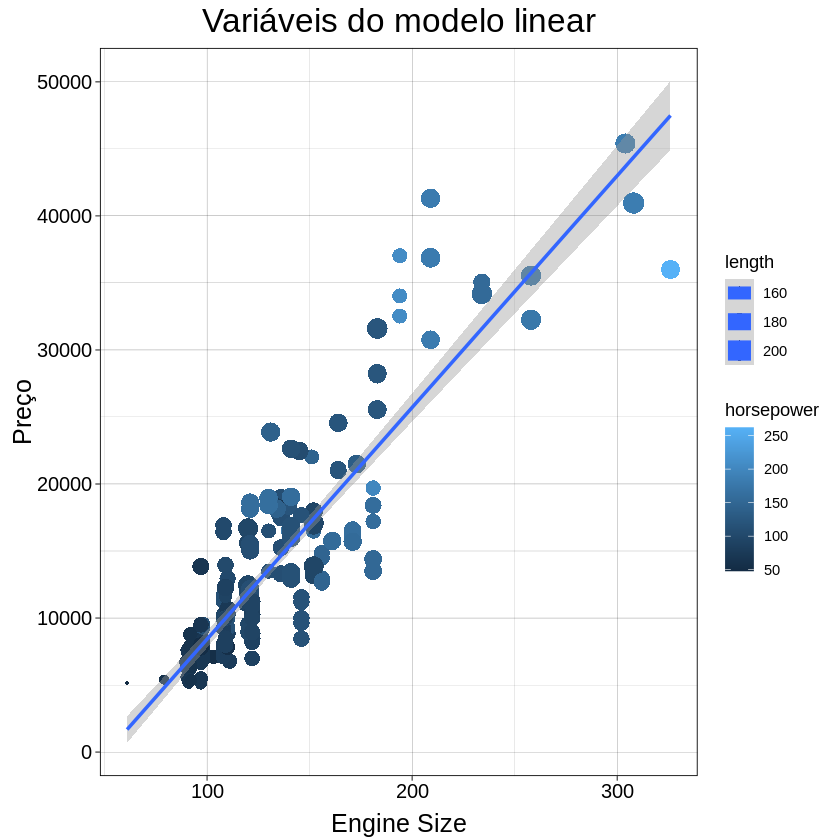

In [ ]:
ggplot(data = autos, aes(y = price, x = engine.size, color = horsepower, size= length )) + 
    geom_point( , stroke = 0) + 
    geom_smooth(method = 'lm')+
    theme_linedraw() +
    xlab("Engine Size") + 
    ylab("Preço") + 
    ggtitle('Variáveis do modelo linear') +
    theme(
        plot.title=element_text(size = 20, hjust = 0.5),
        axis.title.y=element_text(size = 15, vjust = +0.2),
        axis.title.x=element_text(size = 15, vjust = -0.2),
        axis.text.y=element_text(size = 12),
        axis.text.x=element_text(size = 12),
    )

Neste gráfico observamos que o tamanho do motor possui uma relação linear positiva com o preço do carro

#### Verificação gvla

In [ ]:
summary(gvlma(multi))


Call:
lm(formula = price ~ horsepower + length + engine.size + city.mpg, 
    data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9697.0 -1745.7    24.9  1389.4 12904.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -28480.00    7114.51  -4.003 8.99e-05 ***
horsepower      52.74      16.62   3.174 0.001756 ** 
length         114.58      32.30   3.548 0.000491 ***
engine.size    115.32      12.92   8.922 4.06e-16 ***
city.mpg        61.51      83.05   0.741 0.459849    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3499 on 188 degrees of freedom
Multiple R-squared:  0.8168,	Adjusted R-squared:  0.8129 
F-statistic: 209.5 on 4 and 188 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = multi) 

                    Value   p-value                   Decision
Global Stat        27.8

A função gvlma() nos auxilia a verificar o atendimento dos critérios dos mínimos quadrados, sem que isso precise ser realizado manualmente, com a analise da linearidade, da normalidade da variável resposta, da heterocedasticidade e independência das variáveis.

### d)    Fazer uma análise dos resultados do ajuste, discorrendo sobre o impacto de cada preditora, significativa do ponto de vista estatístico, no preço do carro.

In [ ]:
# Novo Modelo
new_multi <- lm(formula = price ~ horsepower + length + engine.size, data = autos)
resumo <- summary(new_multi)
resumo


Call:
lm(formula = price ~ horsepower + length + engine.size, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9351.8 -1808.5    87.3  1351.9 13043.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24227.12    4195.20  -5.775 3.12e-08 ***
horsepower      44.60      12.44   3.585 0.000429 ***
length         102.48      27.83   3.683 0.000301 ***
engine.size    117.33      12.62   9.296  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3495 on 189 degrees of freedom
Multiple R-squared:  0.8162,	Adjusted R-squared:  0.8133 
F-statistic: 279.8 on 3 and 189 DF,  p-value: < 2.2e-16


Novo modelo criado desconsiderando-se  a variável "city.mgp" referente ao consumo de combustivel na cidade. O novo modelo apresenta um R² ajustado de 0,8133, ou seja, este novo modelo é capaz de prever 81,33% da variação dos dados com um avariavel a menos. Pelo princípio da parcimônia devemos optar pelo modelo com a menor complexidade, dado que não houve perda de eficiência. 

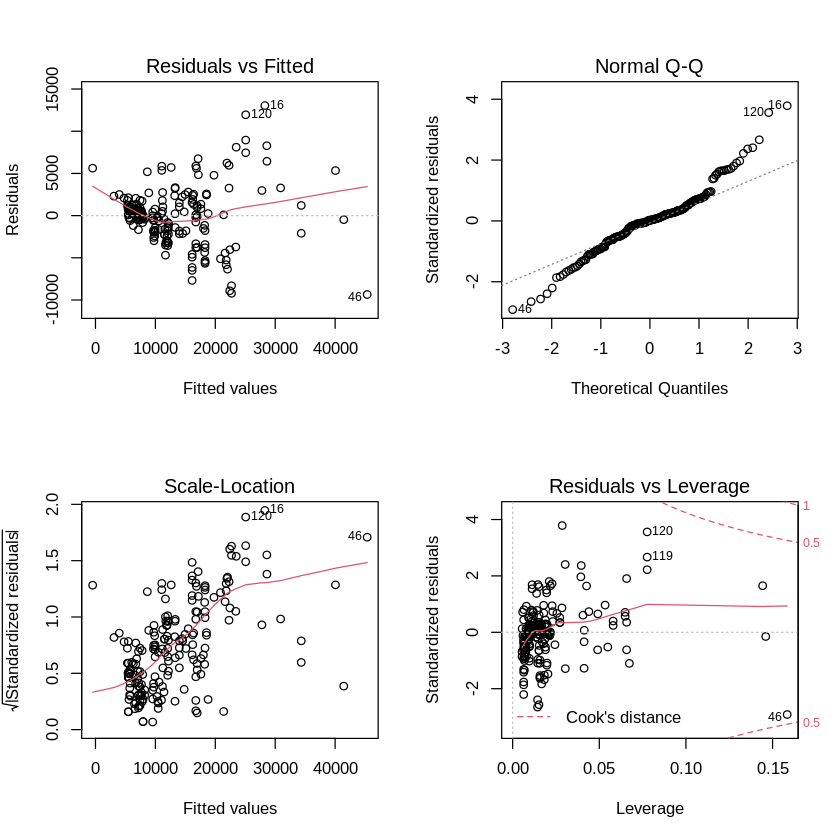

In [ ]:
par(mfrow=c(2,2))
plot(new_multi)

Verificamos neste plot que não há uma tendência clara na orientação dos resíduos, atendendo ao ritério de heterocedasticidade, enquanto a Normal qq nos informa que os dados não seguem a distribuição normal

In [ ]:
summary(gvlma(new_multi))


Call:
lm(formula = price ~ horsepower + length + engine.size, data = autos)

Residuals:
    Min      1Q  Median      3Q     Max 
-9351.8 -1808.5    87.3  1351.9 13043.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24227.12    4195.20  -5.775 3.12e-08 ***
horsepower      44.60      12.44   3.585 0.000429 ***
length         102.48      27.83   3.683 0.000301 ***
engine.size    117.33      12.62   9.296  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3495 on 189 degrees of freedom
Multiple R-squared:  0.8162,	Adjusted R-squared:  0.8133 
F-statistic: 279.8 on 3 and 189 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = new_multi) 

                    Value   p-value                   Decision
Global Stat        30.770 3.411e-06 Assumptions NOT satisfied!
Skewness            4.062 